### XGBoost
https://xgboost.readthedocs.io/en/stable/index.html

**핵심 파라미터**
1. **learning_rate**: 각 트리의 기여도를 조절하는 학습률로, 값이 작을수록 모델의 복잡도가 낮아지지만 더 많은 트리를 필요로 한다.
2. **n_estimators**: 트리의 개수를 의미하며, 많을수록 복잡한 모델이 된다.
3. **max_depth**: 각 트리의 최대 깊이로, 트리가 너무 깊으면 과적합될 수 있다.
4. **objective**: 손실 함수의 종류로, 회귀 문제의 경우 'reg:squarederror', 분류 문제의 경우 'binary:logistic' 등을 사용한다.

In [1]:
!pip install xgboost
# scikit-learn에서 제공x

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/56.8 MB 1.3 MB/s eta 0:00:44
    --------------------------------------- 0.8/56.8 MB 987.4 kB/s eta 0:00:57
    --------------------------------------- 0.8/56.8 MB 987.4 kB/s eta 0:00:57
    --------------------------------------- 1.0/56.8 MB 883.6 kB/s eta 0:01:04
    --------------------------------------- 1.3/56.8 MB 849.7 kB/s eta 0:01:06
    --------------------------------------- 1.3/56.8 MB 849.7 kB/s eta 0:01:06
    --------------------------------------- 1.3/56.8 MB 849.7 kB/s eta 0:01:06
   - -------------------------------------- 1.6/56.8 MB 729.4 kB/s eta 0:01:16
   - -------------------------------------- 1.6/56.8 MB 729.4 kB/s eta 0:01:16
   - -------------------------------------- 1.6/56.8 MB 729.4 kB/s eta 0:0

In [8]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# 아이리스 데이터 로드

data = load_iris()
X = data.data
y=data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# 암 데이터 로드

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
# key가 data, target인 value만 각각 반환
# as_frame: DataFrame형으로 반환

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# xgboost 분류기

xgb_clf = XGBClassifier(
    n_estimators = 100,
    max_depth=3,
    learning_rate = .1,
    random_state = 0
)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f'평가 지표: {accuracy_score(y_train, y_train_pred)}, {accuracy_score(y_test, y_test_pred)}')
#        아이리스: 1.0, 0.9736842105263158
#             암: 1.0, 0.986013986013986 = (TN+TP)/(TN+TP+FN+FP)

print(confusion_matrix(y_test, y_test_pred))
# 오차 행렬

print(classification_report(y_test, y_test_pred))
# 평가 지표: 성능 평가에 대한 모든 결과값
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# precision, recall은 반비례 관계
# (FP 증가-> FN 감소 : precision 감소, recall 증가)
# f1-score
# support: 각 class별로, 에측하는 데 써먹은 데이터 수

평가 지표: 1.0, 0.986013986013986
[[52  1]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [31]:
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate = .1,
    max_depth = 3,
    random_state = 0,
    early_stopping_rounds = 10,
    # histDGB의 early_stopping과 같은 기능
    eval_metric = 'logloss' # 이진 분류 때 자주 사용되는 손실함수
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
# 훈련 데이터로 한 번 더 split. validate(검증)하기 위함
eval_set = [(X_tr, y_tr), (X_val, y_val)]
#           train 데이터     검증 데이터
xgb_clf.fit(X_tr, y_tr, eval_set=eval_set)
# tr, val 검증 후 그 값(logloss함수값) 출력. 전체적으로 점점 감소함
# 300번 정도에서 멈춤. early_stopping_rounds=0를 걸어주어서 500번까지 호출 안 함.
#   = 10번 정도 같은 로스함수를 가졌다는 의미

[0]	validation_0-logloss:0.57452	validation_1-logloss:0.60880
[1]	validation_0-logloss:0.50928	validation_1-logloss:0.55472
[2]	validation_0-logloss:0.45694	validation_1-logloss:0.50527
[3]	validation_0-logloss:0.40953	validation_1-logloss:0.46292
[4]	validation_0-logloss:0.36927	validation_1-logloss:0.42700
[5]	validation_0-logloss:0.33481	validation_1-logloss:0.39919
[6]	validation_0-logloss:0.30438	validation_1-logloss:0.37171
[7]	validation_0-logloss:0.27723	validation_1-logloss:0.34853
[8]	validation_0-logloss:0.25387	validation_1-logloss:0.32843
[9]	validation_0-logloss:0.23308	validation_1-logloss:0.30965
[10]	validation_0-logloss:0.21360	validation_1-logloss:0.29418
[11]	validation_0-logloss:0.19725	validation_1-logloss:0.28057
[12]	validation_0-logloss:0.18229	validation_1-logloss:0.26975
[13]	validation_0-logloss:0.16936	validation_1-logloss:0.25935
[14]	validation_0-logloss:0.15736	validation_1-logloss:0.24851
[15]	validation_0-logloss:0.14565	validation_1-logloss:0.23954
[1

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'logloss'


In [17]:
# 훈련 과정 시각화
import matplotlib.pyplot as  plt

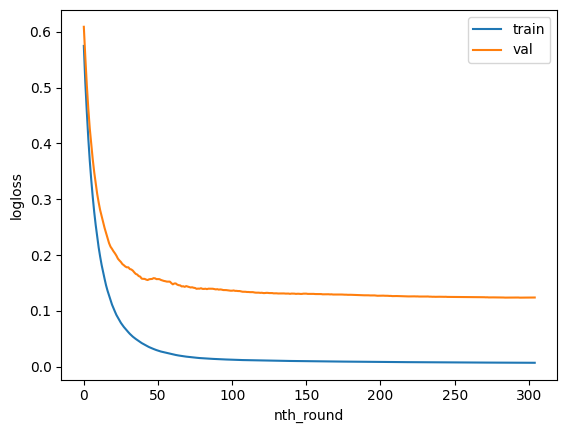

In [32]:
result = xgb_clf.evals_result()

train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('nth_round')
plt.ylabel('logloss')
plt.legend()
plt.show()
# 처음엔 크게 떨어지다가, nth_round 돌 때 미세하게 감소


<function matplotlib.pyplot.show(close=None, block=None)>

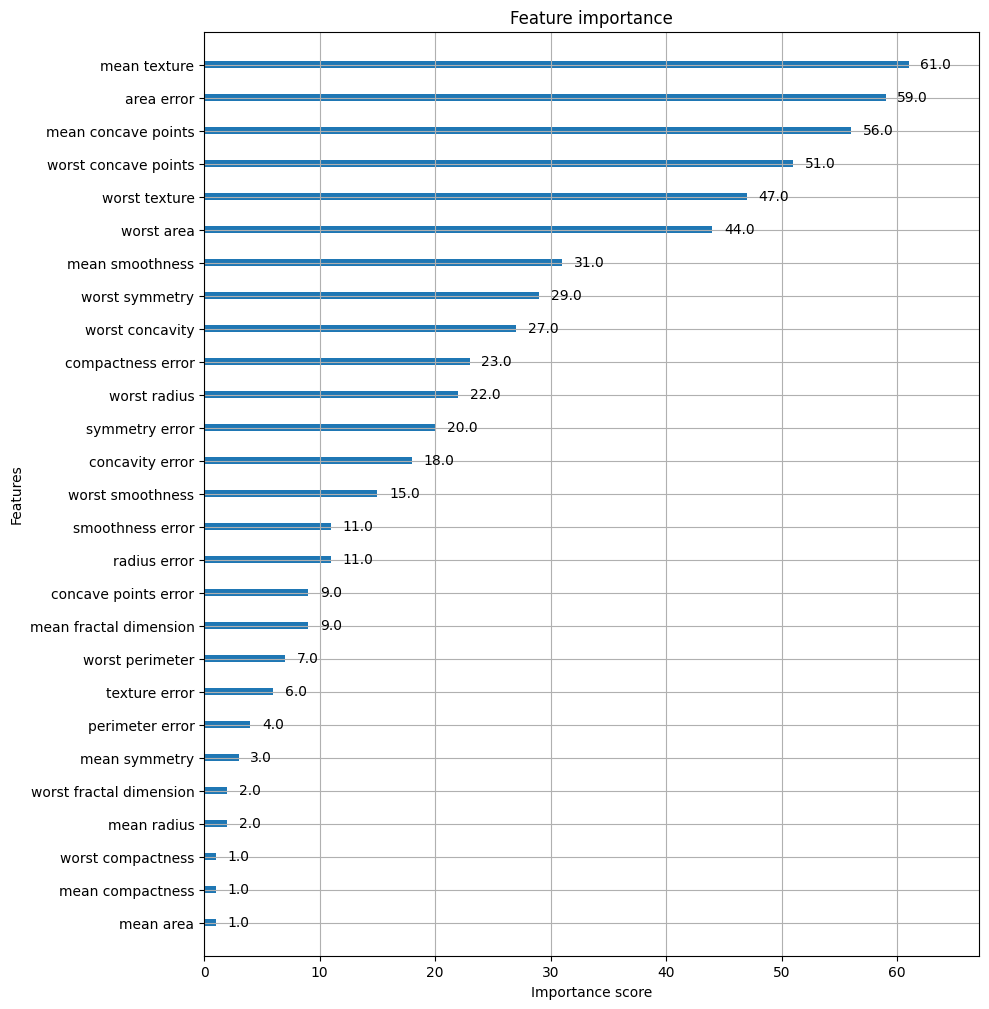

In [ ]:
from xgboost import plot_importance
# feature 중요도를 따로 빼서 계산할 필요 x

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)
plt.show

#X가 DataFrame형이어야 plot_importance()메서드에서
#        feature가 f1, f2... 가 아닌 피쳐 이름으로 출력됨